#Deep Learning con Python
`Autor: Erwing FC 
~erwingforerocastro@gmail.com`

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features=10000
maxlen=500
batch_size=12

print('Cargando datos...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=max_features)
print(len(input_train), 'Secuencias de entrenamiento')
print(len(input_test), 'Secuencias de test')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

###Entrenando el modelo

In [9]:
from keras.layers import Dense,Embedding,LSTM
from keras import Sequential

#estructura
net=Sequential()
net.add(Embedding(max_features,32))
net.add(LSTM(32))
net.add(Dense(1,activation='sigmoid'))

#compilador
net.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['acc'])
#entrenamiento
history=net.fit(input_train,y_train,
                epochs=10,
                batch_size=128,
                validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.5161 - acc: 0.7591 - val_loss: 0.3417 - val_acc: 0.8682
Epoch 2/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.2912 - acc: 0.8879 - val_loss: 0.3355 - val_acc: 0.8674
Epoch 3/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.2345 - acc: 0.9138 - val_loss: 0.5835 - val_acc: 0.8020
Epoch 4/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.2036 - acc: 0.9250 - val_loss: 0.2997 - val_acc: 0.8712
Epoch 5/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.1801 - acc: 0.9336 - val_loss: 0.3377 - val_acc: 0.8484
Epoch 6/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.1557 - acc: 0.9466 - val_loss: 0.3096 - val_acc: 0.8836
Epoch 7/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.1454 - acc: 0.9489 - val_loss: 0.4193 - val_acc:

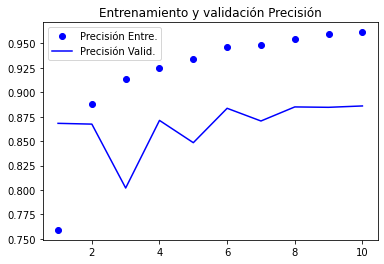

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Precisión Entre.')
plt.plot(epochs, val_acc, 'b', label='Precisión Valid.')
plt.title('Entrenamiento y validación Precisión')
plt.legend()
plt.show()

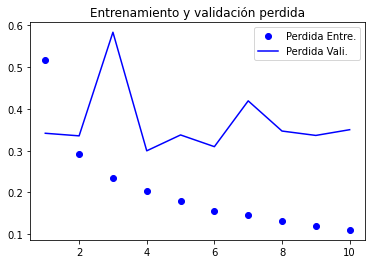

In [11]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Perdida Entre.')
plt.plot(epochs, val_loss, 'b', label='Perdida Vali.')
plt.title('Entrenamiento y validación perdida')
plt.legend()
plt.show()

podemos observar que LSTM no reluce su potencial con una secuencia de texto para identificar los sentimientos, y no es necesario ya que en enfoques anteriores hemos tenido un mejor desempeño con otras tecnicas, la potencia de LSTM se vera mejor aprovechada en otro tipo de ejemplos.